In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import matplotlib
from matplotlib import rc
from matplotlib import cm
import matplotlib.pyplot as plt
from tueplots import bundles

# Load data
df = pd.read_csv('results.csv')


# T-test

We want to make two sided t-test to see if geodesic_cv is different from. This is done across all #ensembles. Maybe we want to do within ensemble?


In [5]:
# We want to make two sided t-test to see if geodesic_cv is different from euclidean_cv
# using data from df and grouping by ensemles
from scipy.stats import ttest_rel

# MNIST
print("MNIST")
print(ttest_rel(df['geolength_cv'], df['euclidean_latent_cv']))
print(ttest_rel(df['geolength_cv'], df['euclidean_latent_cv'], alternative='less'))
print(ttest_rel(df['geolength_cv'], df['euclidean_latent_cv'], alternative='greater'))


MNIST
TtestResult(statistic=-22.331582464645713, pvalue=1.9477555263772584e-40, df=99)
TtestResult(statistic=-22.331582464645713, pvalue=9.738777631886292e-41, df=99)
TtestResult(statistic=-22.331582464645713, pvalue=1.0, df=99)


In [6]:
## Arrange the t-test results in a table
ttest_results_null_0 = []
ttest_results_null_greater = []
ttest_results_null_less = []
for ensamble in df['n_ensemble'].unique():
    ttest_results_null_0.append(ttest_rel(df[df['n_ensemble'] == ensamble]['geolength_cv'], df[df['n_ensemble'] == ensamble]['euclidean_latent_cv']))
    ttest_results_null_greater.append(ttest_rel(df[df['n_ensemble'] == ensamble]['geolength_cv'], df[df['n_ensemble'] == ensamble]['euclidean_latent_cv'], alternative='greater'))
    ttest_results_null_less.append(ttest_rel(df[df['n_ensemble'] == ensamble]['geolength_cv'], df[df['n_ensemble'] == ensamble]['euclidean_latent_cv'], alternative='less'))

ttest_results_null_0 = np.array(ttest_results_null_0)
ttest_results_null_greater = np.array(ttest_results_null_greater)
ttest_results_null_less = np.array(ttest_results_null_less)

ttest_results_null_0 = pd.DataFrame(ttest_results_null_0, columns=['t-statistic', 'p-value'])
ttest_results_null_greater = pd.DataFrame(ttest_results_null_greater, columns=['t-statistic', 'p-value'])
ttest_results_null_less = pd.DataFrame(ttest_results_null_less, columns=['t-statistic', 'p-value'])

ttest_results_null_0['alternative'] = 'two-sided'
ttest_results_null_greater['alternative'] = 'greater'
ttest_results_null_less['alternative'] = 'less'

ttest_results_null_0['null'] = 'no difference'
ttest_results_null_greater['null'] = 'geodesic variation < euclidean variation'
ttest_results_null_less['null'] = 'geodesic_cv > euclidean_cv'

# add the ensemble column
ttest_results_null_0['ensemble'] = df['n_ensemble'].unique()
ttest_results_null_greater['ensemble'] = df['n_ensemble'].unique()
ttest_results_null_less['ensemble'] = df['n_ensemble'].unique()

# order by ensemble
ttest_results_null_0 = ttest_results_null_0.sort_values(by='ensemble')
ttest_results_null_greater = ttest_results_null_greater.sort_values(by='ensemble')
ttest_results_null_less = ttest_results_null_less.sort_values(by='ensemble')

ttest_results_null_greater

# Change the order of the columns
ttest_results_null_0 = ttest_results_null_0[['ensemble', 'null','alternative', 't-statistic', 'p-value']]
ttest_results_null_greater_save = ttest_results_null_greater[['ensemble', 'null','alternative', 't-statistic', 'p-value']]
ttest_results_null_less = ttest_results_null_less[['ensemble', 'null','alternative', 't-statistic', 'p-value']]

# export the table in latex format
#ttest_results_null_greater_save.to_latex('/home/sm/Dropbox/DTU/thesis/code/jax_manifold_flow/thesis_results/ttest_results_null_0.tex', index=False)

ttest_results_null_greater_save

,ensemble,null,alternative,t-statistic,p-value
0,8,geodesic variation < euclidean variation,greater,-22.331582,1.0


# Plots

## Hiostograms of (CV) Coefficient of variation $\frac{\sigma}{\mu}$ of euclidean and geodesic lengths respectively.

In [7]:
plot_fontsize = 11
figsize=(6.72, 4.2)
rc_fonts = {
"font.family": "serif",
"font.size": plot_fontsize,
"figure.figsize": figsize,
"text.usetex": True,
"text.latex.preamble":  r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """
}
#matplotlib.rcParams.update(rc_fonts)

matplotlib.rcParams.update(bundles.icml2024())

/tmp/ipykernel_76781/1876009190.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x='geolength_cv', binwidth=0.001, kde=True, stat='probability', common_norm=True, palette=geodesic_palette, label='Geodesic', ax=ax,zorder=2, alpha=0.7)
/tmp/ipykernel_76781/1876009190.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x='euclidean_latent_cv', binwidth=0.001, kde=True, stat='probability', common_norm=True, palette=euclidean_palette, label='Euclidean', ax=ax, zorder=1)


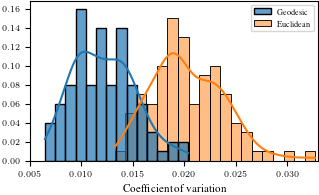

In [ ]:

fig, ax = plt.subplots()

# Set a different color palette for each histogram
geodesic_palette = sns.color_palette("Set1")
euclidean_palette = sns.color_palette("Set2")

sns.histplot(df, x='geolength_cv', binwidth=0.001, kde=True, stat='probability', common_norm=True, palette=geodesic_palette, label='Geodesic', ax=ax,zorder=2, alpha=0.7)
sns.histplot(df, x='euclidean_latent_cv', binwidth=0.001, kde=True, stat='probability', common_norm=True, palette=euclidean_palette, label='Euclidean', ax=ax, zorder=1)

ax.set_ylabel('')

# Set x and y labels
ax.set_xlabel(r'Coefficient of variation')

# Add legend
ax.legend()
ax.set_xlim(0.005, 0.033)
ax.set_xticks(np.arange(0.005, 0.034, 0.005))

# save the plot as pdf
plt.savefig('celeba_prob.pdf', bbox_inches='tight',transparent=True)